# Company Default Data

### Description:
The dataset contains information on default payments & company details of Companies in India as on March 2019.

### Usage
Default

### Format
A data frame with 1384 observations on the following 11 variables

***Num***: ID of each company

***Default***: Default payment in next month (1=yes, 0=no)

***Total_assets***: Total amount of assets owned by the company

***Total_income***: Total income a business receives before any taxes, expenses, adjustments, exemptions, or deductions are taken out

***PAT_as_%_of_total_income***: Profit per sales dollar after all expenses are deducted from sales

***PBDITA_as_%_of_total_income***: Profit before depreciation, income tax and amortization divided by Total income

***PBT_as_%_of_total_income***: Profit per sales dollar before all expenses are deducted from sales

***Cash_profit_as_%_of_total_income***: Profit recorded by a business that uses the cash basis of accounting (Cash Profit:Total Cash profit)

***Current_ratio***: Liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year (Current assets divided by current liabilities)

***Debt_to_equity_ratio***: Leverage ratio that calculates the weight of total debt and financial liabilities against total shareholders’ equity


### Source:
Simulated data

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [2]:
Default = pd.read_csv('CompanyDefault.csv')

#Glimpse of Data
Default.head()

,Num,default,Total_assets,Total_income,PAT_as_%_of_total_income,PBDITA_as_%_of_total_income,PBT_as_%_of_total_income,Cash_profit_as_%_of_total_income,Current_ratio,Debt_to_equity_ratio
0,1,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


#### Fixing messy column names (containing spaces) for ease of use

In [3]:
Default.columns = Default.columns.str.replace('as_%_of', 'to')

In [4]:
Default.head()

,Num,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,1,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [5]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 1384 
The number of columns (variables) is 10


#### Data types of all variables

In [6]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 10 columns):
Num                            1384 non-null int64
default                        1384 non-null int64
Total_assets                   1384 non-null float64
Total_income                   1384 non-null float64
PAT_to_total_income            1384 non-null float64
PBDITA_to_total_income         1384 non-null float64
PBT_to_total_income            1384 non-null float64
Cash_profit_to_total_income    1384 non-null float64
Current_ratio                  1384 non-null float64
Debt_to_equity_ratio           1384 non-null float64
dtypes: float64(8), int64(2)
memory usage: 108.2 KB


In [7]:
Default.duplicated().sum()

0

In [8]:
Default.drop('Num', axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [9]:
Default.describe()

,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,0.234104,256.762568,381.657131,-29.922088,-4.380180,-27.554086,-16.239313,1.771303,3.394933
std,0.423591,404.127921,583.461117,346.245121,218.854784,332.137949,245.587280,2.323773,11.364884
min,0.000000,0.500000,0.100000,-9700.000000,-6400.000000,-9700.000000,-6400.000000,0.000000,0.000000
25%,0.000000,25.800000,31.225000,0.000000,3.501816,0.000000,1.045456,0.880000,0.187500
50%,0.000000,103.450000,187.550000,1.464327,8.569963,2.148565,4.638115,1.230000,0.860000
75%,0.000000,296.825000,428.142581,4.075183,13.438735,5.345512,8.024023,1.942500,1.970000
max,1.000000,2275.971000,3449.826000,150.000000,100.000000,100.000000,100.000000,18.790000,90.944100


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [10]:
Default["default"].value_counts()

0    1060
1     324
Name: default, dtype: int64

#### Checking proportion of default

In [11]:
Default.default.sum() / len(Default.default)

0.23410404624277456

#### Check for missing values

In [12]:
Default.isnull().sum()

default                        0
Total_assets                   0
Total_income                   0
PAT_to_total_income            0
PBDITA_to_total_income         0
PBT_to_total_income            0
Cash_profit_to_total_income    0
Current_ratio                  0
Debt_to_equity_ratio           0
dtype: int64

There are no missing values in the dataset.

#### Getting Top 5 rows

In [13]:
Default.head()

,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


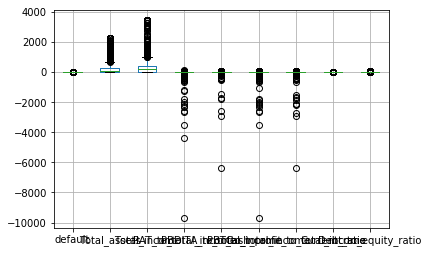

In [14]:
Default.boxplot()

In [15]:
Default_X = Default.drop('default', axis = 1)
Default_Y = Default['default']

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in Default_X.columns:
    lr,ur=remove_outlier(Default[column])
    Default_X[column]=np.where(Default_X[column]>ur,ur,Default_X[column])
    Default_X[column]=np.where(Default_X[column]<lr,lr,Default_X[column])

In [18]:
Default = pd.concat([Default_X, Default_Y], axis = 1)

### Correlation heatmap

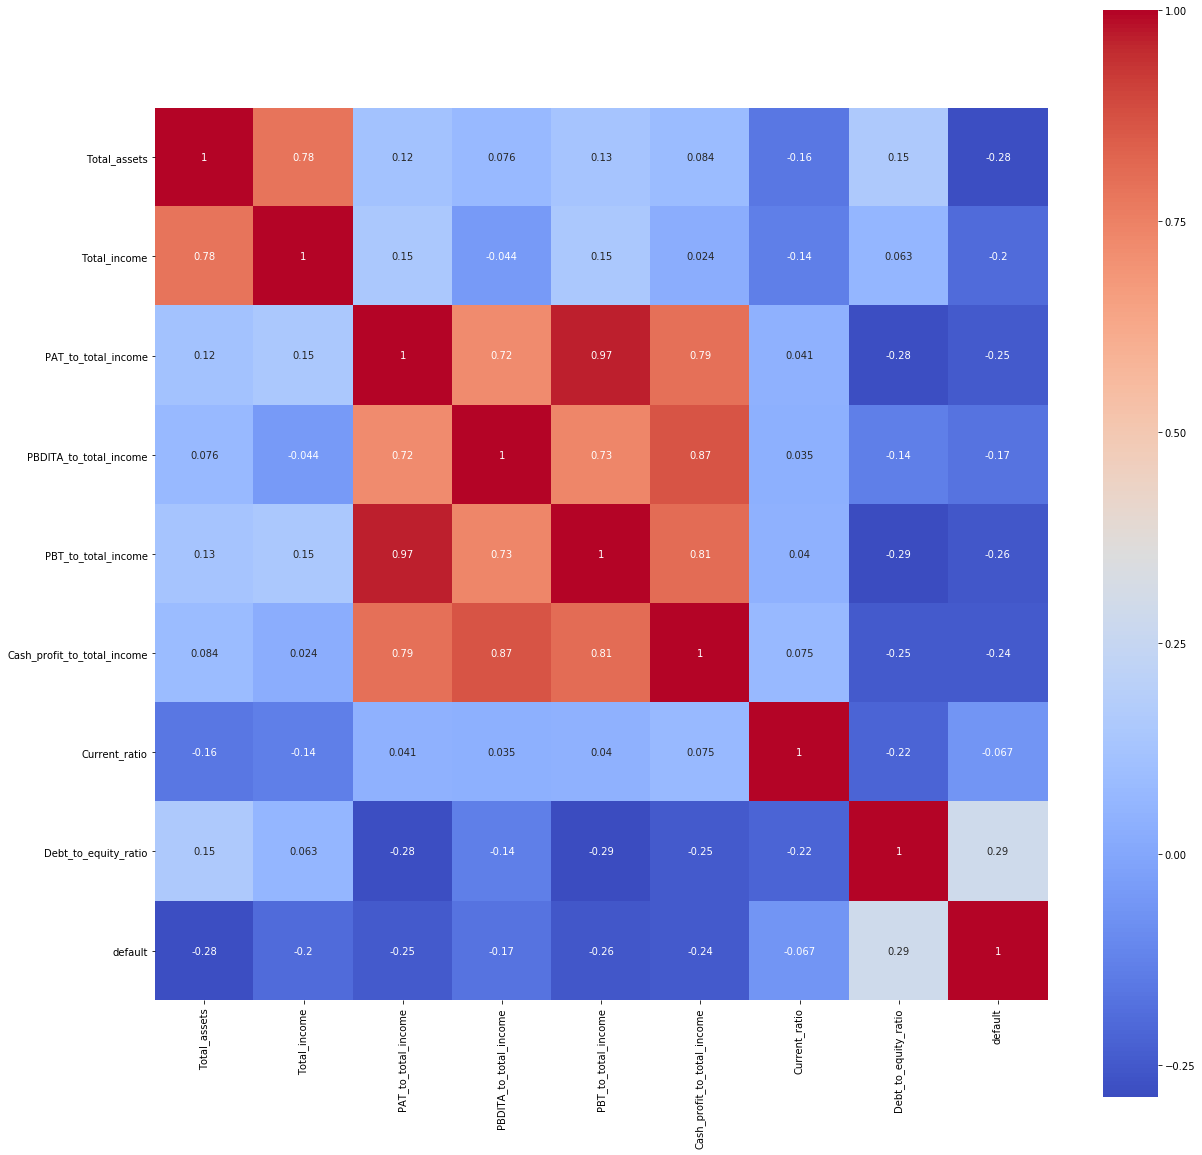

In [19]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(20,20))  # setting the size of figure to 12 by 10
p=sns.heatmap(Default.corr(), annot=True,cmap='coolwarm',square=True)

- Vaiables such as PAT_as_perc_of_total_income, PBDITA_as_perc_of_total_income, PBT_as_perc_of_total_income, Cash_profit_as_perc_of_total_income  are highly correlated among themselves
- Total income & Total assets seem to be highly correlated with each other

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [20]:
import statsmodels.formula.api as SM

## Model 1

Lets check all columns we have in the dataset

In [21]:
Default.columns

Index(['Total_assets', 'Total_income', 'PAT_to_total_income',
       'PBDITA_to_total_income', 'PBT_to_total_income',
       'Cash_profit_to_total_income', 'Current_ratio', 'Debt_to_equity_ratio',
       'default'],
      dtype='object')

In [22]:
f_1 = 'default ~ Total_assets + Total_income + PAT_to_total_income + PBDITA_to_total_income + PBT_to_total_income + Cash_profit_to_total_income + Current_ratio + Debt_to_equity_ratio'

#### Fitting the logistic regression model on 'Default' dataset

In [23]:
model_1 = SM.logit(formula = f_1, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.414667
         Iterations 7


#### Checking the parameters

In [24]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1384
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.2380
Time:                        09:35:50   Log-Likelihood:                -573.90
converged:                       True   LL-Null:                       -753.16
Covariance Type:            nonrobust   LLR p-value:                 1.378e-72
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9072      0.193     -4.693      0.000      -1.286      -0.528
Total_assets                   -0.0079      0.001    -10.203      0.000      -0.009      -0.006
Total_income                    0.0016      0.000      3.777      0.000       0.001       0.002
PAT_to_total_income             0.0406      0.068      0.601      0.548      -0.092       0.173
PBDITA_to_total_income          0.0331      0.015      2.186      0.029       0.003       0.063
PBT_to_total_income            -0.0845      0.053     -1.588      0.112      -0.189       0.020
Cash_profit_to_total_income    -0.0605      0.022     -2.757      0.006      -0.104      -0.018
Current_ratio                  -0.1658      0.081     -2.046      0.041      -0.325      -0.007
Debt_to_equity_ratio            0.4780      0.049      9.665      0.000       0.381       0.575
===============================================================================================
"""

Most of the ratio variables are insignificant. 

#### Checking the Variance Inflation Factor

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
X = Default.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,PBT_to_total_income,21.102170
2,PAT_to_total_income,19.296923
5,Cash_profit_to_total_income,7.997149
3,PBDITA_to_total_income,7.834539
0,Total_assets,5.199503
1,Total_income,5.155808
6,Current_ratio,1.983593
7,Debt_to_equity_ratio,1.857565


In [27]:
X = X.drop('PBT_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Cash_profit_to_total_income,7.876186
3,PBDITA_to_total_income,7.775399
0,Total_assets,5.199503
1,Total_income,5.140456
2,PAT_to_total_income,3.500457
5,Current_ratio,1.983329
6,Debt_to_equity_ratio,1.845903


In [28]:
X = X.drop('Cash_profit_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Total_assets,5.197439
1,Total_income,5.139785
3,PBDITA_to_total_income,3.914149
2,PAT_to_total_income,2.814014
4,Current_ratio,1.977934
5,Debt_to_equity_ratio,1.793156


In [29]:
X = X.drop('Total_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,PBDITA_to_total_income,3.664134
1,PAT_to_total_income,2.758106
3,Current_ratio,1.955957
4,Debt_to_equity_ratio,1.757982
0,Total_income,1.697737


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y = Default['default']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [33]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

## Model 2

In [34]:
model_2 = SM.logit(formula = 'default ~ PBDITA_to_total_income + PAT_to_total_income + Current_ratio + Debt_to_equity_ratio + Total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.477293
         Iterations 6


#### Checking the coefficients

In [35]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      962
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.1276
Time:                        09:35:54   Log-Likelihood:                -462.02
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 1.934e-27
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8359      0.215     -3.897      0.000      -1.256      -0.415
PBDITA_to_total_income    -0.0293      0.012     -2.368      0.018      -0.054      -0.005
PAT_to_total_income       -0.0269      0.027     -0.997      0.319      -0.080       0.026
Current_ratio             -0.1514      0.097     -1.557      0.119      -0.342       0.039
Debt_to_equity_ratio       0.3813      0.055      6.992      0.000       0.274       0.488
Total_income              -0.0017      0.000     -5.340      0.000      -0.002      -0.001
==========================================================================================
"""

PBDITA_to_total_income is an insignificant variable, therefore, we will eliminate it.

## Model 3

In [36]:
model_3 = SM.logit(formula = 'default ~ PBDITA_to_total_income + Current_ratio + Debt_to_equity_ratio + Total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.477799
         Iterations 6


#### Checking the coefficients

In [37]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      963
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.1267
Time:                        09:35:55   Log-Likelihood:                -462.51
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 5.029e-28
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7943      0.210     -3.775      0.000      -1.207      -0.382
PBDITA_to_total_income    -0.0382      0.009     -4.371      0.000      -0.055      -0.021
Current_ratio             -0.1547      0.097     -1.590      0.112      -0.345       0.036
Debt_to_equity_ratio       0.3990      0.052      7.726      0.000       0.298       0.500
Total_income              -0.0018      0.000     -5.806      0.000      -0.002      -0.001
==========================================================================================
"""

Current_ratio is still insignificant, therefore, we will eliminate it

## Model 4

Adding variables pertaining to Repayment Status

In [38]:
model_4 = SM.logit(formula = 'default ~ PBDITA_to_total_income + Debt_to_equity_ratio + Total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.479129
         Iterations 6


In [39]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      964
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.1242
Time:                        09:35:58   Log-Likelihood:                -463.80
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 2.469e-28
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0365      0.148     -6.981      0.000      -1.327      -0.745
PBDITA_to_total_income    -0.0388      0.009     -4.430      0.000      -0.056      -0.022
Debt_to_equity_ratio       0.4148      0.051      8.171      0.000       0.315       0.514
Total_income              -0.0017      0.000     -5.717      0.000      -0.002      -0.001
==========================================================================================
"""

In [40]:
y_prob_pred_train = model_4.predict(Default_train)

In [41]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [42]:
from sklearn import metrics

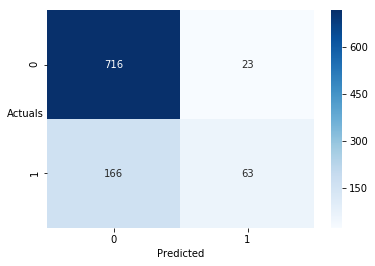

In [43]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [44]:
63/229

0.27510917030567683

In [45]:
63/86

0.7325581395348837

## Prediction on the Data

Now, let us see the predicted probability values.

In [46]:
y_prob_pred_4 = model_4.predict()

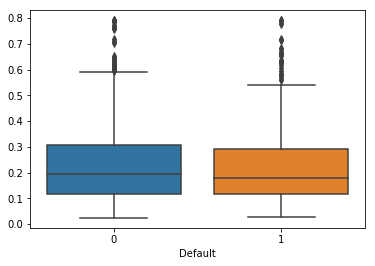

In [47]:
sns.boxplot(x=Default['default'],y=y_prob_pred_4)
plt.xlabel('Default');

#### Choosing the optimal threshold

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [49]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.26149740838988317

#### Validating on the train set with revised threshold

In [50]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

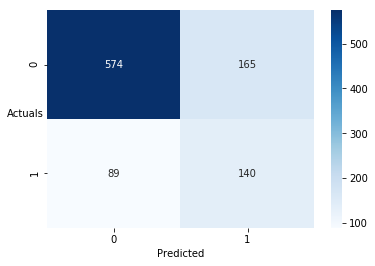

In [51]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [52]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.866     0.777     0.819       739
           1      0.459     0.611     0.524       229

    accuracy                          0.738       968
   macro avg      0.662     0.694     0.672       968
weighted avg      0.770     0.738     0.749       968



#### Validating on the test set

In [53]:
y_prob_pred_test = model_4.predict(Default_test)

In [54]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

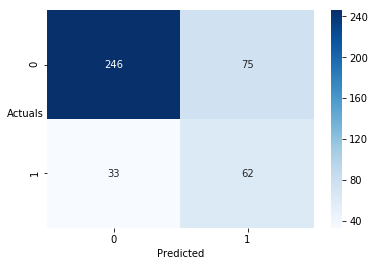

In [55]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [56]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.882     0.766     0.820       321
           1      0.453     0.653     0.534        95

    accuracy                          0.740       416
   macro avg      0.667     0.709     0.677       416
weighted avg      0.784     0.740     0.755       416



# Linear Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [58]:
LDA = LinearDiscriminantAnalysis()

In [59]:
lda_model = LDA.fit(X_train, y_train)

In [60]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [61]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       739
           1       0.72      0.31      0.44       229

    accuracy                           0.81       968
   macro avg       0.77      0.64      0.66       968
weighted avg       0.80      0.81      0.78       968



In [62]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       321
           1       0.67      0.37      0.48        95

    accuracy                           0.81       416
   macro avg       0.75      0.66      0.68       416
weighted avg       0.80      0.81      0.79       416



In [63]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [65]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2834827553153811

In [66]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

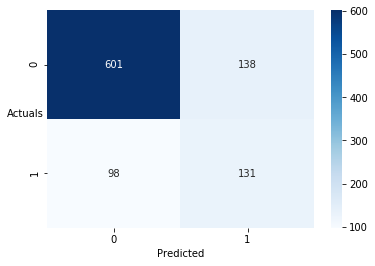

In [67]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [68]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.860     0.813     0.836       739
           1      0.487     0.572     0.526       229

    accuracy                          0.756       968
   macro avg      0.673     0.693     0.681       968
weighted avg      0.772     0.756     0.763       968



In [69]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

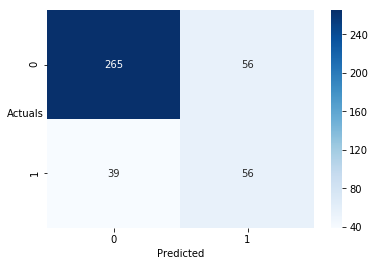

In [70]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [71]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.872     0.826     0.848       321
           1      0.500     0.589     0.541        95

    accuracy                          0.772       416
   macro avg      0.686     0.708     0.695       416
weighted avg      0.787     0.772     0.778       416



# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [73]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [74]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 50}

In [75]:
best_grid = grid_search.best_estimator_

In [76]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [77]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       739
           1       0.87      0.69      0.77       229

    accuracy                           0.90       968
   macro avg       0.89      0.83      0.86       968
weighted avg       0.90      0.90      0.90       968



In [78]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       321
           1       0.78      0.55      0.64        95

    accuracy                           0.86       416
   macro avg       0.83      0.75      0.78       416
weighted avg       0.85      0.86      0.85       416



### Conclusion

Amongst all the models we tried in this case Logistic Regression seems to be best aligned to our objective.

## END